<font size = 1 color="gray">Introducción a la computación numérica y simbólica con python</font>  

<img src="img/logo-vector-u-tad.jpg" align="left" >

# 2. Resolución de ecuaciones

En ingeniería es habitual encontrar situaciones en las que hay que resolver ecuaciones, por ejemplo en problemas de optimización. Encontrar las raíces de una ecuación $f(x)-a=0$ puede no ser posible de forma analítica si $f(x)$ es muy complicada. Los métodos numéricos ofrecen soluciones aproximadas.

## Método de *fuerza bruta*

No se suele emplear para encontrar soluciones precisas, pero tiene algunas aplicaciones. Se toma la serie numérica y se localizan los intervalos en los que se produce un cambio de signo. 

Esto es válido si y solo si la función está definida y es contínua en el intervalo [a,b], porque en virtud del **teorema de Bolzano** si se dan esas condiciones y f(x) toma valores de distinto signo en los extremos a y b, entonces existe al menos un punto c del intervalo abierto (a, b) en el que la función se anula.

Nada impide que haya más de una raíz dentro de un intervalo, por lo que el método solo funcionará razonablemente si los intervalos son muy pequeños y la serie no es patológica.

Empezamos por un ejemplo muy simple. Vamos a buscar la raíz de $y = 2x - 1$ en el intervalo [0,1]. Se cumplen las condiciones del teorema de Bolzano. 

In [9]:
import numpy as np


npuntos = 100
# linspace crea un vector entre los extremos indicados, con tantos puntos como el tercer parámetro
x = np.linspace(0,1,npuntos)
y = 2*x-1

for i in range(0,npuntos-1):
    if (y[i]*y[i+1] < 0):                    # Esta condición solo se produce si son de distinto signo
        print("Hay una raíz entre",x[i],"y",x[i+1], "que podemos aproximar por: ", (x[i+1]+x[i])/2)

Hay una raíz entre 0.494949494949495 y 0.5050505050505051 que podemos aproximar por:  0.5


Imaginemos que queremos resolver la ecuación $sen(x)=0.4$ en el intervalo $[0,2\pi]$. Vamos a representar la función para tener una pista de lo que puede ocurrir.

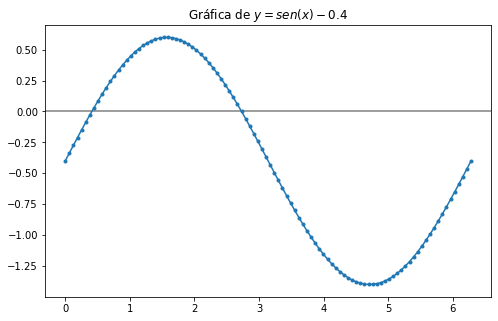

In [10]:
import matplotlib.pyplot as plt

npuntos = 100
# linspace crea un vector entre los extremos indicados, con tantos puntos como el tercer parámetro
x = np.linspace(0,2*np.pi,npuntos)
y = np.sin(x)-0.4

# Representación de la gráfica
plt.figure(figsize=(8,5)) # tamaño de la gráfica en pulgadas
plt.title('Gráfica de $y = sen(x)-0.4$') # Título icluyendo una fórmula LaTeX
plt.axhline(y=0,color="grey")
plt.plot(x, y, marker='.',label="$sin(x)-0.4$")
plt.show()   # muestra la gráfica

Ahora, definimos una función para la búsqueda por fuerza y buscamos con enlla las raíces.

In [11]:
def fuerzabruta(serie,x):
    raices = list()              # lista vacía
    lserie = len(serie)
    for i in range(lserie-1):
        if ((serie[i+1]*serie[i])<0):     # Producto negativo si hay cambio de signo
            raices.append((x[i+1]+x[i])/2)
    return raices

y = np.sin(x)-0.4
raiceseq = fuerzabruta(y,x)
print("Raíces =", raiceseq)
print("Valor de la función (arcsin(0.4)) =",np.arcsin(0.4))

Raíces = [0.4125323686532052, 2.7607935440637577]
Valor de la función (arcsin(0.4)) = 0.41151684606748806


Ejemplo para una función más complicada $e^{x/3}-cos(4x)=0.7$

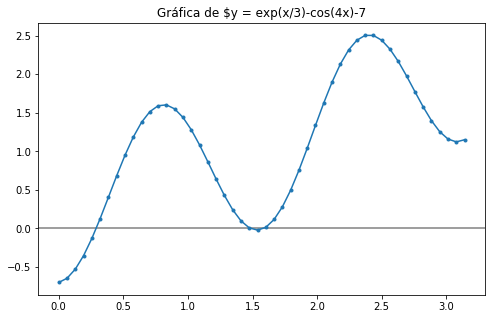

In [12]:
# Primero calculamos la serie para 50 puntos

def frara(x):
    return(np.exp(x/3)-np.cos(4*x)-0.7)

npuntos = 50
x = np.linspace(0,np.pi,npuntos)
y = frara(x)

# Representación de la gráfica
plt.figure(figsize=(8,5)) # tamaño de la gráfica en pulgadas
plt.title('Gráfica de $y = exp(x/3)-cos(4x)-7') # Título icluyendo una fórmula LaTeX
plt.axhline(y=0,color="grey")
plt.plot(x, y, marker='.',label="$sin(x)-0.4$") # leyenda
plt.show()   # muestra la gráfica

Ahora buscamos las raíces por fuerza bruta y podemos estimar el error cometido.

In [13]:
raiceseq = fuerzabruta(y,x)
print("Raíces", raiceseq)
errores=[abs(frara(i)) for i in raiceseq]
print("f(raiz)", errores)

Raíces [0.28851361104396056, 1.5066821910073496, 1.5707963267948966]
f(raiz) [0.0038358089914822813, 0.01489714258608521, 0.011908205035531472]


# Método de Raphson-Newton

El [método de Newton](https://es.wikipedia.org/wiki/M%C3%A9todo_de_Newton)  se basa en aproximaciones sucesivas al punto en el que la función se anula usando su derivada, lo que exige que la función sea derivable. Se escoge un punto al azar y se traza tangente $r(x)=f(x_0) + f'(x_0)(x − x_0)$. El punto de corte $x_1 = x_0 − \frac{f (x_0)}{f'(x_0)}$ de esta recta está más próximo a la raíz de $f(x)$. 

Reiterando esta operación se puede escibir $x_{i+1} = x_i − \frac{f (x_i)}{f'(x_i)}$, que conducirá a encontrar un punto fijo que es la solución de $f(x)=0$. Un punto fijo es aquel que cumple que $x_{i+1} = x_{i}$.

El método de Newton es rápido pero tiene limitaciones. Resulta imprescindible conocer el valor de la derivada, si no tenemos la función inicial sino solo una serie de valores, tendremos que usar un método numérico para hallar esa derivada. Además, puede no converger. Un caso obvio se produce si la derivada en el punto inicial es cero. Por último, hay que tener cuidado con la precisión en punto flotante, porque se llegará a diferencias mínimas.

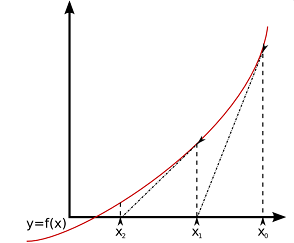
<small>Fuente: Wikipedia</small>

Desarrollamos ahora el método Newton-Raphson para encontrar el valor de la raíz de  en el intervalo [0,1] Para eso, necesitamos conocer su derivada que es $1/3 * e^{x/3} + 4 sin(4x)$

In [14]:
def NewtonRaphson(f, fdev, xi, precision):
    while abs(f(xi)) > precision:           # Como trabajamos en punto flotante nunca será 0
        xi = xi - (f(xi))/fdev(xi)          # sino que tenemos que elegir un margen de precisión
    return xi

# Usamos la misma función frara del apartado anterior, tenemos que calcular la derivada

def derdevrara(x):
    return (1/3)*np.exp(x/3)+4*np.sin(4*x)

x = np.linspace(0,1,100)
y = frara(x)
ydev = derdevrara(x)

raiz = NewtonRaphson(frara,derdevrara,0.5,0.000001)
print("Valor de la raiz {:.8f}".format(raiz))
errorN=abs(frara(raiz))
print("f(raiz)", errorN)

Valor de la raiz 0.28946597
f(raiz) 5.561632510087122e-08


Puede comprobarse que el error es mucho menor que el obtenido con el método de la fuerza bruta en el apartado anterior.

# Método de la secante

Este método evita tener que conocer los valores de la derivada, lo que resulta muy conveniente cuando desconocemos la expresión analítica de la función original. Recordemos que muchas de las aplicaciones del cálculo numérico se realizan con valores obtenidos por muestreo y que se desconoce a qué función responden. 

En lugar de la derivada de la función desconocida, se utiliza una secante entre dos aproximaciones sucesivas $(x_i,f(x_i))$ e $(i+1,f(x_{i+1}))$.

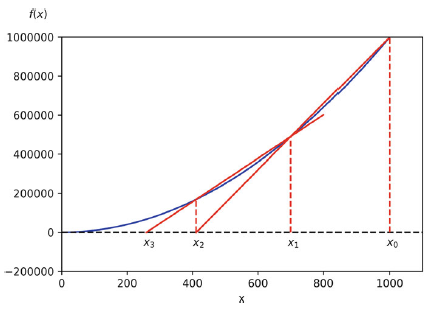
Fuente: Wikipedia

La pendiente $m_j$ de cada trama no es $f'(x_j)$ como en el método de Newton, sino que vale 
$m_j = \frac{f(x_j)-f(x_{j-1})}{x_j-x_{j-1}}$ y la ecuación del punto de corte de la iteración $i+1$ se puede escribir:

$x_{i+1} = x_{i} - \frac{x_{i+1}-x_{i}}{f(x_{i+1})-f(x_{i})}$

Si en el método de Newton escogemos un punto inicial, aquí tenemos que proporcionar dos al algoritmo. Al igual que  el método de Newton puede suceder que no haya convergencia.

In [15]:
def secante(f, x0, x1, precision):
    iteraciones = 0
    f_x0 = f(x0)
    f_x1 = f(x1)
    while abs(f_x1) > precision: 
        denominador = (f_x1 - f_x0)/(x1 - x0)
        x = x1 - f_x1/denominador
        x0 = x1
        x1 = x
        f_x0 = f_x1
        f_x1 = f(x1)
        if abs(f_x1) > precision:
            return x
    
raizsec = secante(frara,0.5,0.4,0.000001)
print("Valor de la raiz {:.8f}".format(raizsec))
errorS=abs(frara(raizsec))
print("f(raiz)", errorS)

Valor de la raiz 0.28915764
f(raiz) 0.00124245833212


El error es algo mejor que con el método de fuerza bruta pero bastante peor que con el de Newton.

## Método de la bisección

Este método garantiza la convergencia, a costa de ser más lento que los anteriores. Como ellos, solo encuentra una raíz y hay que proporcionar un número inicial. Sea $f(x)$ contínua en el intervalo $[a,b]$ y tal que los signos de $f(a)$ y $f(b)$ son diferentes, con lo que sabemos que hay, al menos, una raíz. Elegimos el punto medio entre $a$ y $b$ y calculando $f(\frac{a+b}{2})$ sabemos si la raíz cae hacia la derecha o hacia la izquierda de dicho punto. Repetimos iterativamente la operación en el intervalo en el que cambia el signo hasta alcanzar la precisión deseada.

Aplicamos este método para hallar la raíz de $x^2-16 = 0$ en el intervalo [0,10].

In [17]:
# Función que implementa el método
def biseccion(f, x_izda, x_dcha, precision):
    f_izda = f(x_izda)
    x_M = (x_izda + x_dcha)/2
    f_M = f(x_M)
    while abs(f_M) > precision:
        if f_izda*f_M > 0: # el mismo signo
            x_izda, f_izda = x_M, f_M
        else:
            x_dcha = x_M
        x_M = (x_izda + x_dcha)/2
        f_M = f(x_M)
    return(x_M)

raizbis = biseccion(lambda x:x**2-16,0,10,0.000001)
print("La raiz de x^2-16 según el método de la bisección es {:.8f}".format(raizbis))

La raiz de x^2-16 según el método de la bisección es 4.00000006


## Resolución numérica con SciPy

El código de los ejemplos que hemos visto no está optimizado y no trata de forma adecuada situaciones de error. El módulo `optimize` del paquete `SciPy` ofrece funciones más robustas que son las que debemos usar en nuestras aplicaciones.

In [18]:
from scipy import optimize

rnewt = optimize.newton(frara, 0.5, fprime=fdevrara)  # Método de Newton-Raphson
print("Valor de la raiz de e^(x/3)-cos(4*x)=0.7 entre 0 y 1 según el método de Newton {:.10f}".format(raiz))
errorN=abs(frara(rnewt))
print("f(rnewt)", errorN)

# Si no se indica la función derivada, el método optimize.newton aplicala regla de la secante

rsec = optimize.newton(frara, 0.5)
print("Valor según el método de la secante {:.10f}".format(raiz))
errorS=abs(frara(rsec))
print("f(rsec)", errorS)

Valor de la raiz de e^(x/3)-cos(4*x)=0.7 entre 0 y 1 según el método de Newton 0.2894659663
f(rnewt) 6.661338147750939e-16
Valor según el método de la secante 0.2894659663
f(rsec) 1.1479706074624119e-13


Podemos comprobar que las aproximaciones que se han obtenido son mucho mejores que las que arrojaban nuestros programas.

Las funciones `brenth` y `brentq` trabajan con el método de la bisección

In [9]:
rbrentq = optimize.brentq(lambda x: x**2 - 16, 0,10)
rbrenth = optimize.brenth(lambda x: x**2 - 16, 0,10)
print("Raíz de x^2-16 según brentq {:.16f}".format(rbrentq))
print("Raíz de x^2-16 según brenth {:.16f}".format(rbrenth))

Raíz de x^2-16 según brentq 3.9999999999999538
Raíz de x^2-16 según brenth 4.0000000000000000


La resolución numérica es la única que funciona cuando la ecuación es <a href=https://es.wikipedia.org/wiki/Ecuación_trascendente>trascendente</a> que, por definición, no puede reducirse por métodos algebraicos. 

La ecuación $cos(x) = x$ tiene un único punto fijo de valor 0.739085... llamado número de Dottie. Cualquier estudiante curioso habrá observado que si en su calculadora pulsa varias veces seguidas el botón de la función coseno termina apareciendo este valor. Una posible solución es calcular los valores de la serie numérica para encontrar el valor al que converge


La serie converge al valor 0.7390851332151607


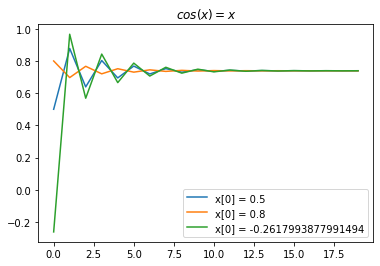

In [19]:
numpuntos = 1000
for j in [0.5,0.8,-np.pi/12]:
    x = np.zeros(numpuntos)
    x[0] = j
    for i in range(1,numpuntos):
        x[i] = np.cos(x[i-1])
    plt.plot(x[0:20],label="x[0] = "+str(x[0]))
plt.title('$cos(x) = x$')
plt.legend()
print("La serie converge al valor",x[-1])

Una solución más precisa se consigue invocando cualquiera de los métodos numéricos que hemos visto.

In [22]:
# Solución numérica
raiz = optimize.newton(lambda x: np.cos(x)-x, 0.5)   # Método de la secante
print("Raíz de cos(x) = x :",raiz)

Raíz de cos(x) = x : 0.7390851332151601


---

<font size="1" color="grey">
    (c) 2020 Javier García Algarra. <a href='https://www.u-tad.com'>www.u-tad.com</a> <br>
Licensed under a Creative Commons Reconocimiento 4.0 Internacional License
</font> 